##Introduction to the Human Activity Recognition Dataset

The Human Activity Recognition (HAR) dataset compiles sensor data from 30 individuals aged 19 to 48 as they perform six activities (WALKING, WALKING UPSTAIRS, WALKING DOWNSTAIRS, SITTING, STANDING, LAYING) while wearing a Samsung Galaxy S II smartphone with accelerometers and gyroscopes on their waists. Capturing 3-axial linear acceleration and angular velocity at 50Hz, the dataset was divided randomly into training (70%) and test (30%) sets after precise video labeling.

Preprocessing included noise filtering, segmenting data into 2.56-second windows with 50% overlap (128 readings per window), and separating gravitational and body motion components using low-pass filtering. Feature vectors were then derived from these windows, combining time and frequency domain calculations. This dataset is a valuable resource for Human Activity Recognition research, offering insights into real-world human movements.

##Acknowledgements
## Source:

Jorge L. Reyes-Ortiz(1,2), Davide Anguita(1), Alessandro Ghio(1), Luca Oneto(1) and Xavier Parra(2)
1 - Smartlab - Non-Linear Complex Systems Laboratory
DITEN - Università degli Studi di Genova, Genoa (I-16145), Italy.
2 - CETpD - Technical Research Centre for Dependency Care and Autonomous Living
Universitat Politècnica de Catalunya (BarcelonaTech). Vilanova i la Geltrú (08800), Spain
activityrecognition '@' smartlab.ws


##Key Question of the Project:

The key question of my project: "Can we effectively group and understand the underlying patterns in human activity data using K-Means clustering and Principal Component Analysis (PCA), and how do these two unsupervised learning techniques compare in their ability to reveal meaningful insights?"

##Steps for the project:

###Data Collection, Preprocessing and EDA:

Obtain the Human Activity Recognition dataset, ensuring it includes sensor data, activity labels, and participant information.
Perform data preprocessing steps, such as handling missing values, scaling or normalizing features, and encoding categorical variables if necessary.
Conduct exploratory data analysis to gain a comprehensive understanding of the dataset, including summary statistics, data distributions, and visualizations.
Explore the distribution of activity labels and the balance of classes.
###Feature Selection/Extraction:

Decide whether to use the raw sensor data or extracted features for K-Means clustering and PCA. You can choose to explore both approaches.
If using feature extraction, consider selecting relevant features and extracting them from the raw data.
###K-Means Clustering:

Apply K-Means clustering to group similar data points together based on patterns in the data.
Experiment with different values of K (number of clusters) and evaluate the quality of clusters using metrics like the silhouette score or elbow method.
Visualize the results of K-Means clustering, possibly in 2D or 3D space if applicable.
###Principal Component Analysis (PCA):

Apply PCA to reduce the dimensionality of the data while preserving its essential information.
Analyze the explained variance ratio to determine the optimal number of principal components.
Visualize the data in the reduced feature space.
###Comparison and Interpretation:

Compare the results of K-Means clustering and PCA in terms of their ability to reveal patterns in the data.
Assess the interpretability of the clusters generated by K-Means and the insights gained from PCA.
Explore how well clusters align with the actual activity labels.
###Evaluation:

Evaluate the quality of K-Means clusters using internal validation metrics (e.g., silhouette score) and, if available, external metrics (e.g., Adjusted Rand Index) by comparing the clusters to ground truth labels.
###Conclusion and Future Work:

Conclude your project by summarizing the key takeaways.
Suggest potential areas for further research or improvements to the analysis.
###Presentation and Visualization:

By following these steps, you can systematically analyze the Human Activity Recognition dataset using K-Means clustering and PCA, and compare the results to address your key project question.

---------------------------------------------------------------------------------

##Data Collection, Preprocessing and EDA

- In this step we will obtain the Human Activity Recognition dataset, ensuring it includes sensor data, activity labels, and participant information.
- Conduct exploratory data analysis to gain a comprehensive understanding of the dataset, including summary statistics, data distributions, and visualizations.
- Explore the distribution of activity labels and the balance of classes.
- Perform data preprocessing steps, such as handling missing values, scaling or normalizing features, and encoding categorical variables if necessary.

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

np.random.seed(111)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/DTSA_5510/final_project/train.csv')

In [5]:
data.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [7]:
data.select_dtypes(include='object').columns

Index(['activity'], dtype='object')

In [8]:
print(f"Shape of the data set: {data.shape}")

Shape of the data set: (3609, 563)


 ### Let's make a bar plot showing the distribution of different activity labels

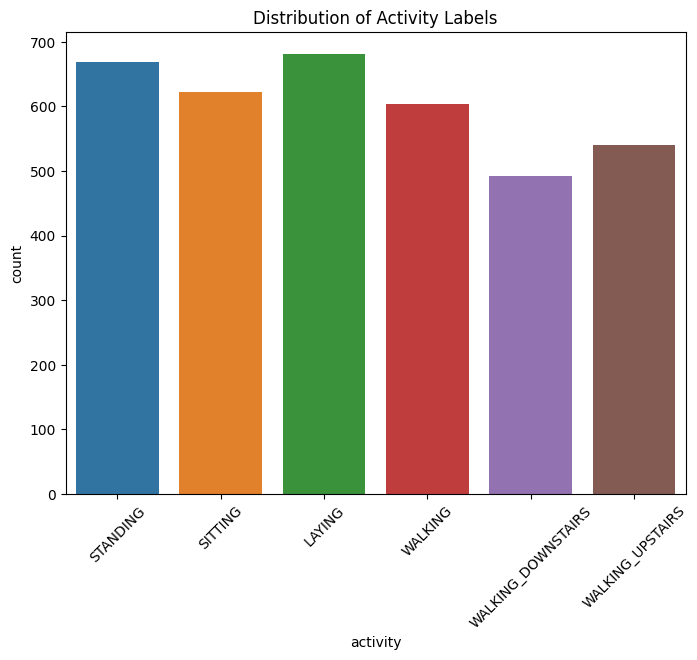

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='activity', data=data)
plt.title('Distribution of Activity Labels')
plt.xticks(rotation=45)
plt.show()

### Compute summary statistics for a subset of features(due to the large number of columns):

In [10]:
subset_features = data.iloc[:, :15]
subset_features.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,-0.467034,-0.302020,-0.564031,0.524482
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,0.540188,0.282596,0.280224,0.358055
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,-1.000000,-1.000000,-0.984000,-0.935000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,-0.936000,-0.562000,-0.812000,0.216000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,-0.877000,-0.456000,-0.718000,0.782000
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,-0.018900,-0.066000,-0.348000,0.844000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,1.000000,0.802000,1.000000,0.906000


### Analyze correlations between a subset of features (due to the large number of columns):

<ipython-input-11-f1ba66428fe5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = subset_features.corr()


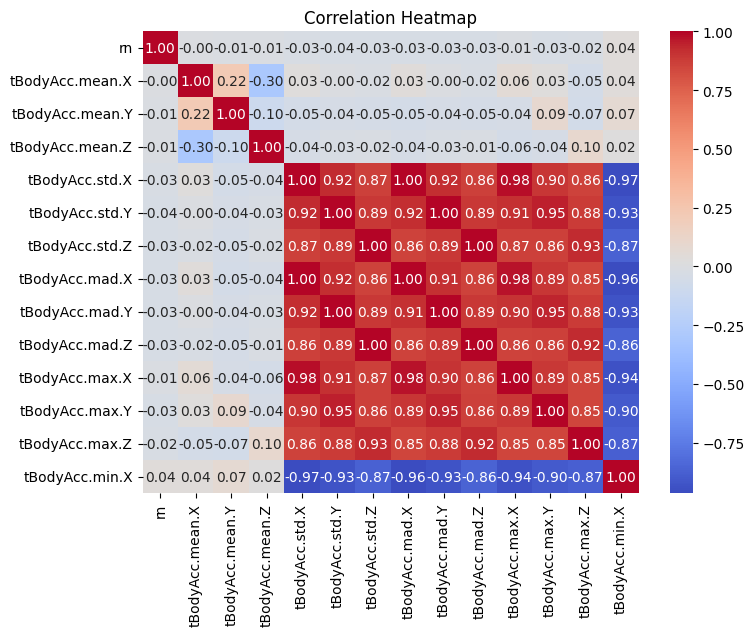

In [11]:
subset_features = data.iloc[:, :15]
corr_matrix = subset_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

 Including an identifier column such as ***rn*** does not align with the primary goals of our algorithms and can be safely omitted without influencing the analysis.

In practice, it is considered a best practice to eliminate such identifier columns from the analysis, as they may introduce extraneous noise and unwarranted intricacies. When conducting K-Means clustering or PCA, it is generally advised to direct our attention toward the columns housing the substantive data or features that hold relevance to the analysis.

Also, In unsupervised learning using techniques like K-Means clustering and PCA, labels, such as the activity column, are not used during the training process. However, saving the activity column as labels can still be beneficial for evaluating model performance in the context of known ground truth, facilitating interpretability of results, preparing for future supervised learning tasks, and conducting comparative analyses among different unsupervised methods. These labels provide valuable context and enable a more comprehensive assessment of how well the unsupervised algorithms reveal underlying patterns in the data.

In [12]:
labels = data['activity']
data = data.drop(['rn', 'activity'], axis = 1)
labels_keys = labels.unique().tolist()
labels = np.array(labels)

print(f'Activity labels: {labels_keys}')

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


###Checking if there are missing values:

In [13]:
missing_rows = data.isnull().sum().to_frame('Sum')
print('Amount of rows with missing values:', len(missing_rows[missing_rows['Sum'] > 0]))

Amount of rows with missing values: 0


##Feature Selection/Extraction:

### I choose to use the raw sensor data without feature extraction, so I can directly use all 563 columns as my input features for K-Means clustering and PCA. Using raw data may provide more interpretability then feature extraction.

## K-Means Clustering:

- Apply K-Means clustering to group similar data points together based on patterns in the data.
- Experiment with different values of K (number of clusters) and evaluate the quality of clusters using metrics like the silhouette score or elbow method.
- Visualize the results of K-Means clustering, possibly in 2D or 3D space if applicable.

let's normalize our dataset:

In [14]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

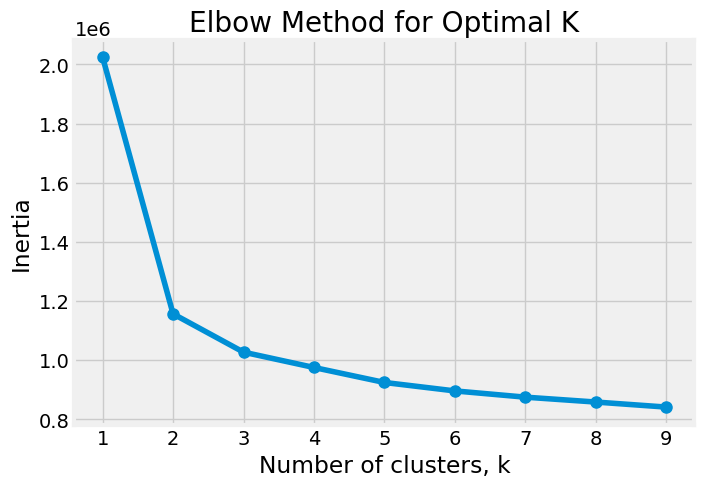

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
plt.plot(ks, inertias, marker='o', markersize=8, linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(True)
plt.show()

### It appears that the optimal value of "k," signifying the "elbow" point of the curve, corresponds to two clusters.

k_means function would be created with the following characteristics:

    """
    Function k_means applies k-means clustering algorithm on dataset and prints the crosstab of cluster and actual labels
    and clustering performance parameters.

    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels

    Output:
    1 - Crosstab of cluster and actual labels
    2 - Performance table
    """

In [16]:
def k_means(n_clust, data_frame, true_labels):

    # Initialize and fit the K-Means model
    k_means = KMeans(n_clusters=n_clust, random_state=111, n_init=30)
    k_means.fit(data_frame)

    # Get cluster labels assigned by K-Means and make c_labels global to use outside of the function
    global c_labels
    c_labels = k_means.labels_

    # Create a DataFrame to combine cluster and original labels
    cluster_df = pd.DataFrame({'Cluster Label': c_labels, 'Original Label': true_labels.tolist()})

    # Compute and display a crosstab of cluster vs. original labels
    cluster_vs_labels_crosstab = pd.crosstab(cluster_df['Cluster Label'], cluster_df['Original Label'])

    # Display the crosstabulation
    print("**Crosstab of Cluster and Original Labels:**")
    display(cluster_vs_labels_crosstab)

    # Predict cluster labels for the entire dataset
    y_clust = k_means.predict(data_frame)

    # Print clustering performance metrics
    print('\nClustering Performance Metrics:')
    performance_metrics = {
        'Inertia': k_means.inertia_,
        'Homogeneity': homogeneity_score(true_labels, y_clust),
        'Completeness': completeness_score(true_labels, y_clust),
        'V-Measure': v_measure_score(true_labels, y_clust),
        'ARI': adjusted_rand_score(true_labels, y_clust),
        'AMI': adjusted_mutual_info_score(true_labels, y_clust),
        'Silhouette': silhouette_score(data_frame, y_clust, metric='euclidean')
    }

    # Format and display the performance metrics
    for metric, value in performance_metrics.items():
        print(f'{metric:13s}: {value:.3f}')


**Crosstab of Cluster and Original Labels:**


Original Label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
Cluster Label,,,,,,
0,1,1,0,603,493,535
1,680,622,668,0,0,6



Clustering Performance Metrics:
Inertia      : 1156484.009
Homogeneity  : 0.378
Completeness : 0.981
V-Measure    : 0.546
ARI          : 0.329
AMI          : 0.546
Silhouette   : 0.390


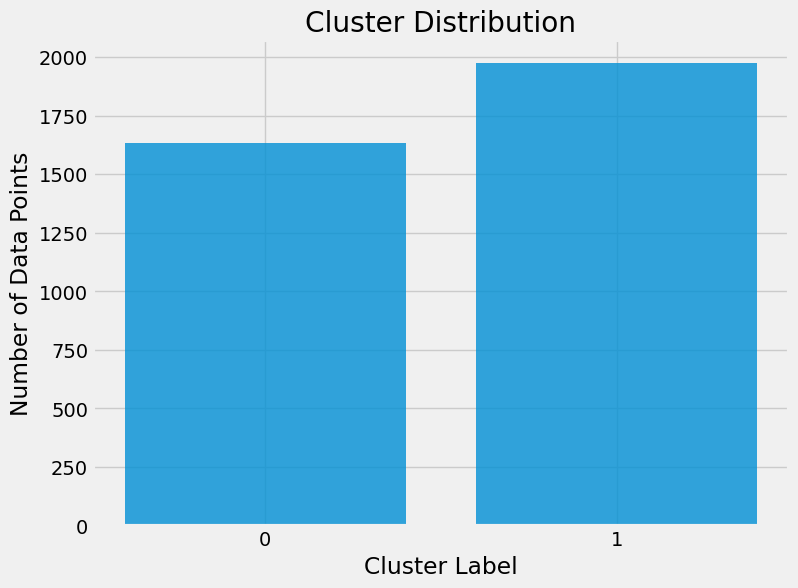

In [17]:
k_means(n_clust=2, data_frame=data, true_labels=labels)
unique_labels, counts = np.unique(c_labels, return_counts=True)

# Create a bar chart to visualize the cluster distribution
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, counts, align='center', alpha=0.8)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Cluster Distribution')
plt.xticks(unique_labels)
plt.show()

###Observation:
Cluster **Label 0** corresponds to more dynamic activities involving movement(WALKING,	WALKING_DOWNSTAIRS,	WALKING_UPSTAIRS), while Cluster **Label 1** corresponds to more sedentary activities(LAYING, SITTING,	STANDING).

###Clustering Performance Metrics:

**Inertia:** The inertia value is a measure of how spread out the data points within each cluster are. A lower inertia indicates that the data points are closer to each other within the clusters. In this case, the inertia is relatively high, which may suggest that data points within clusters are not tightly grouped.

**Homogeneity:** Homogeneity measures the extent to which each cluster contains only data points that belong to a single class (original label). A higher homogeneity score indicates better separation of clusters. Here, the homogeneity score is relatively low (`0.378`), suggesting that clusters are not highly homogeneous in terms of original labels.

**Completeness:** Completeness measures the extent to which all data points of a given class are assigned to the same cluster. A higher completeness score indicates that clusters are capturing entire classes well. The completeness score here is relatively high (`0.981`), indicating good completeness.

**V-Measure:** The V-Measure is the harmonic mean of homogeneity and completeness. It provides a balance between the two metrics. A higher V-Measure indicates a better balance between homogeneity and completeness. Here, the V-Measure is `0.546`.

**ARI (Adjusted Rand Index):** ARI measures the similarity between true labels and cluster assignments while correcting for chance. A higher ARI score suggests better agreement between the true labels and clusters. In this case, the ARI is `0.329`, indicating moderate agreement.

**AMI (Adjusted Mutual Information):** AMI measures the mutual information between true labels and cluster assignments, adjusted for chance. Higher AMI scores indicate better agreement. Here, the AMI is `0.546`.

**Silhouette Score:** The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score suggests that data points are well-clustered. The silhouette score here is `0.390`, which is indicative of reasonable clustering.

###Conclusion:

In summary, the clustering results of k = 2 on the whole dataset show that while there is some separation between clusters, they are not highly homogeneous in terms of original labels. The V-Measure, ARI, and AMI suggest moderate agreement between the clustering and true labels. However, It looks like algorithm found patterns for Moving and Not-Moving activity with high level of accuracy. Further analysis and fine-tuning of the clustering algorithm may be needed to improve the separation of clusters and achieve better results.

 ### Evaluate the clustering performance by applying the algorithm to create six clusters, which corresponds to the original number of classes in the dataset.

**Crosstab of Cluster and Original Labels:**


Original Label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
Cluster Label,,,,,,
0,20,443,476,0,0,0
1,0,0,0,26,75,4
2,1,0,0,329,107,438
3,106,158,192,0,0,2
4,554,22,0,0,0,0
5,0,0,0,248,311,97



Clustering Performance Metrics:
Inertia      : 895968.714
Homogeneity  : 0.547
Completeness : 0.588
V-Measure    : 0.567
ARI          : 0.428
AMI          : 0.566
Silhouette   : 0.112


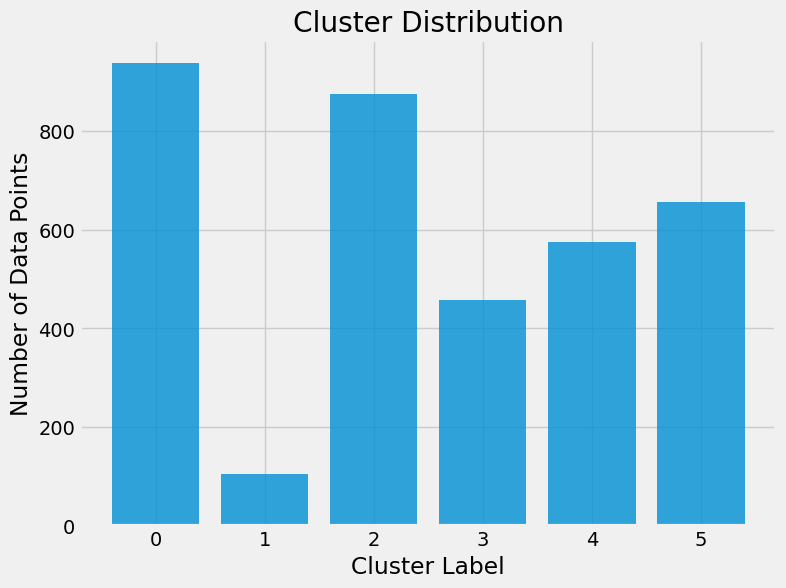

In [18]:
k_means(n_clust=6, data_frame=data, true_labels=labels)
unique_labels, counts = np.unique(c_labels, return_counts=True)

# Create a bar chart to visualize the cluster distribution
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, counts, align='center', alpha=0.8)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Cluster Distribution')
plt.xticks(unique_labels)
plt.show()

- Cluster **Label 0** primarily contains data points associated with "SITTING," "STANDING," "LAYING," and relatively few "WALKING" activities.
- Cluster **Label 1** predominantly contains data points related to "WALKING" and "WALKING_DOWNSTAIRS," with a small representation of "WALKING_UPSTAIRS."
- Cluster **Label 2** mainly captures "WALKING," "WALKING_DOWNSTAIRS," and "WALKING_UPSTAIRS" activities.
- Cluster **Label 3** primarily contains data points related to "SITTING," "STANDING," and "LAYING," with limited data from other activities.
- Cluster **Label 4** predominantly represents the "LAYING" activity.
- Cluster **Label 5 **primarily captures "WALKING_DOWNSTAIRS," "WALKING_UPSTAIRS," and "WALKING."

These results indicate that the algorithm has created clusters that align with certain activity patterns, but there is still some overlap between activities within some clusters.

###Clustering Performance Metrics:

**Inertia:** The inertia value, measuring the spread of data within clusters, is `895,968.714`. It indicates that data points within clusters are greatly spread out.

**Homogeneity:** The homogeneity score is `0.547`, suggesting that clusters contain data points from a single original label (activity) to a moderate extent. Improvement comparing to k=2  `0.378`

**Completeness:** Completeness is `0.588`, indicating that slightly higer then half data points of a given class are assigned to the same cluster. Huge reduction compare to the `0.981` from k = 2.

**V-Measure:** The V-Measure, which balances homogeneity and completeness, is `0.567`. Slight improvement to the k = 2.

**ARI (Adjusted Rand Index):** The ARI is` 0.428`, suggesting moderate agreement between clustering and true labels. Slight improvement to the k = 2.

**AMI (Adjusted Mutual Information):** The AMI is `0.566`, indicating a reasonable level of mutual information between true labels and clusters.
Slight improvement to the k = 2.

**Silhouette Score:** The silhouette score is `0.112`, indicating a limited degree of separation between clusters.significant decrease compare to the k= 2 silhouette score of `0.390`.

In summary, clustering with six clusters results in some alignment with the original activity labels. However, there is still overlap between activities in certain clusters, indicating room for improvement. The V-Measure, ARI, and AMI scores suggest moderate agreement between clusters and true labels. Further refinement of the clustering approach may enhance the separation of activity patterns. It appears that there isn't a strong correspondence between the clusters and the original labels when using 6 clusters, so I will continue to use two clusters for the analysis.

Let's convert `activity` labels into a binary format, where `"0"` represents stationary activities (STANDING, SITTING, LAYING) and `"1"` represents moving activities.

In [19]:
labels_binary = labels.copy()
for i in range(len(labels_binary)):
    if (labels_binary[i] == 'STANDING' or labels_binary[i] == 'SITTING' or labels_binary[i] == 'LAYING'):
        labels_binary[i] = 0
    else:
        labels_binary[i] = 1
labels_binary = np.array(labels_binary.astype(int))

**Crosstab of Cluster and Original Labels:**


Original Label,0,1
Cluster Label,,
0,2,1631
1,1970,6



Clustering Performance Metrics:
Inertia      : 1156484.009
Homogeneity  : 0.977
Completeness : 0.978
V-Measure    : 0.978
ARI          : 0.991
AMI          : 0.978
Silhouette   : 0.390


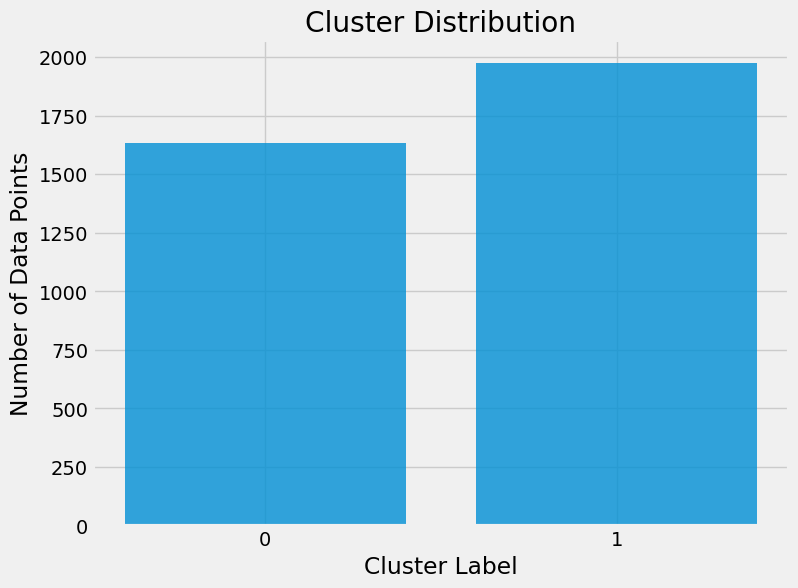

In [20]:
k_means(n_clust=2, data_frame=data, true_labels=labels_binary)
unique_labels, counts = np.unique(c_labels, return_counts=True)

# Create a bar chart to visualize the cluster distribution
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, counts, align='center', alpha=0.8)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Cluster Distribution')
plt.xticks(unique_labels)
plt.show()

## Binary Format Clustering:

Cluster **Label 0** contains data points primarily associated with stationary activities (STANDING, SITTING, LAYING), with only `2` instances classified as moving.
Cluster **Label 1** consists mainly of data points related to moving activities, with `1970` instances classified as moving and only `6` instances classified as stationary.
###Clustering Performance Metrics for Binary Format:

**Inertia:** The inertia value is the same as in the previous two-cluster analysis, indicating similar data spread within clusters.

**Homogeneity:** The homogeneity score is significantly higher (`0.977`), indicating that clusters align well with the binary format of stationary vs. moving activities.

**Completeness:** Completeness is also high (`0.978`), indicating that most data points of each class are correctly assigned to clusters.

**V-Measure:** The V-Measure is `0.978`, suggesting a strong balance between homogeneity and completeness.

**ARI (Adjusted Rand Index):** The ARI is exceptionally high (`0.991`), indicating excellent agreement between the binary format and clusters.

**AMI (Adjusted Mutual Information):** The AMI is `0.978`, indicating a substantial mutual information between the binary format and clusters.

**Silhouette Score:** The silhouette score remains the same at `0.390`, indicating reasonable separation between clusters.

### Comparison:

The binary format clustering results demonstrate a much stronger correspondence between clusters and the binary format, where "0" represents stationary activities and "1" represents moving activities. This format results in extremely high homogeneity, completeness, and adjusted Rand Index (ARI), indicating an excellent agreement between clusters and the binary labels.
Compared to the previous two-cluster analysis, the binary format clustering appears to provide a more meaningful separation of data points. It suggests that categorizing activities into stationary and moving is a better representation of the data's underlying structure, as evidenced by the significantly improved clustering performance metrics.

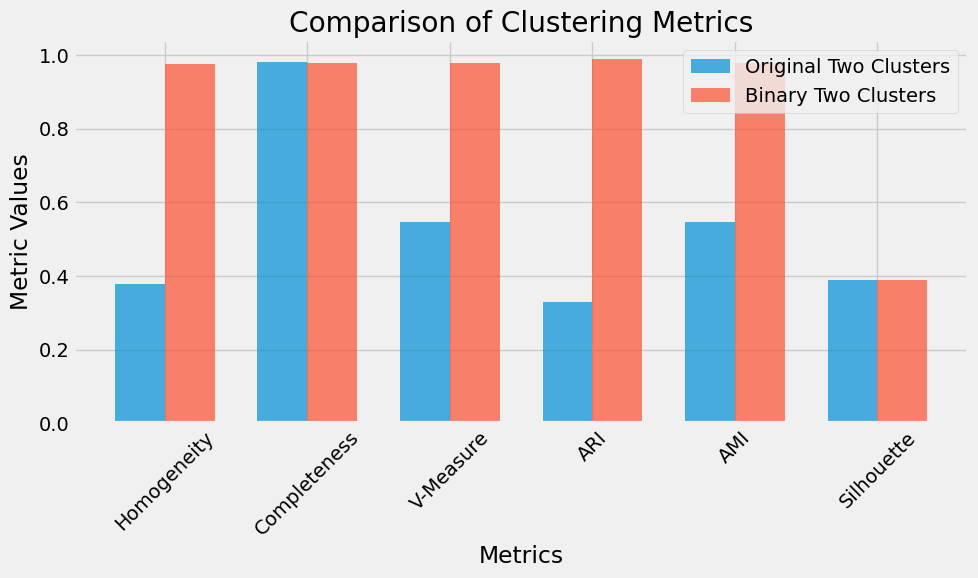

In [21]:
# Define the clustering metrics for both approaches
metrics_original = {
    "Homogeneity": 0.378,
    "Completeness": 0.981,
    "V-Measure": 0.546,
    "ARI": 0.329,
    "AMI": 0.546,
    "Silhouette": 0.390,
}

metrics_binary = {
    "Homogeneity": 0.977,
    "Completeness": 0.978,
    "V-Measure": 0.978,
    "ARI": 0.991,
    "AMI": 0.978,
    "Silhouette": 0.390
}

# List of metric names
metric_names = list(metrics_original.keys())

# List of metric values for each approach
values_original = list(metrics_original.values())
values_binary = [metrics_binary.get(metric, np.nan) for metric in metric_names]

# Create a bar chart to compare metrics
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metric_names))

plt.bar(index, values_original, bar_width, label='Original Two Clusters', alpha=0.7)
plt.bar(index + bar_width, values_binary, bar_width, label='Binary Two Clusters', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Metric Values')
plt.title('Comparison of Clustering Metrics')
plt.xticks(index + bar_width / 2, metric_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Principal component analysis (PCA)

As the next step in the project, we will explore Principal Component Analysis (PCA), a powerful technique for dimensionality reduction. PCA enables us to reduce a high-dimensional dataset while retaining the essential information within a smaller set of variables.

The current 2-cluster algorithm has demonstrated effective pattern recognition for distinguishing between moving and not-moving labels. However, we aim to investigate whether further improvements in clustering performance can be achieved through dimensionality reduction techniques like PCA. This will help us assess if a more compact representation of the data can enhance our clustering results.

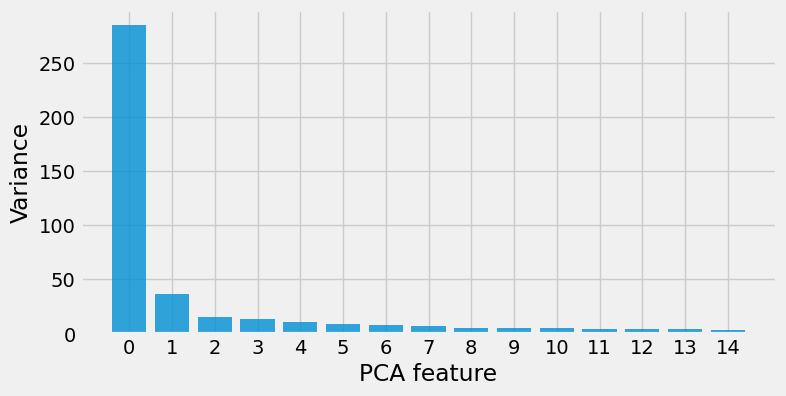

In [22]:
#check for optimal number of features
pca = PCA(random_state=111)
pca.fit(data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], alpha = 0.8)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

**Observation:**

The observation that a single feature stands out as the best fit for our algorithm in the Human Activity Recognition (HAR) dataset indicates the effectiveness of Principal Component Analysis (PCA) in capturing the most significant sources of data variation. This suggests that one feature can explain a substantial portion of the dataset's variability, potentially due to high feature correlation or dominant patterns. Utilizing this single feature improves interpretability, reduces complexity, and may enhance algorithm performance in recognizing human activity patterns.

In [23]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=111)
    global data_reduced
    data_reduced = pca.fit_transform(data)
    print('Shape of the new Data df: ' + str(data_reduced.shape))

In [24]:
pca_transform(n_comp=3)
k_means(n_clust=2, data_frame=data_reduced, true_labels=labels)


Shape of the new Data df: (3609, 3)
**Crosstab of Cluster and Original Labels:**


Original Label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
Cluster Label,,,,,,
0,1,1,0,603,493,535
1,680,622,668,0,0,6



Clustering Performance Metrics:
Inertia      : 349389.219
Homogeneity  : 0.378
Completeness : 0.981
V-Measure    : 0.546
ARI          : 0.329
AMI          : 0.546
Silhouette   : 0.662


**Observations:**

- The dataset has been transformed to have three principal components.
The new data shape is (3609, 3), indicating a reduced dimensionality.

**Clustering Performance Metrics:**

The PCA with three components retains some level of overlap between clusters and original activity labels, as indicated by the clustering performance metrics. While it improves on some aspects, such as the silhouette score, there is still room for enhancement in capturing distinct patterns within the data. Further exploration or optimization of the number of principal components may be warranted to improve clustering results.

### Let's visualize it in 3D:

In [25]:
import plotly.express as px

colors = ['green', 'blue', 'orange', 'gray', 'pink', 'red']
# Create a DataFrame for visualization
data_for_plot = pd.DataFrame({
    'PC1': data_reduced[:, 0],
    'PC2': data_reduced[:, 1],
    'PC3': data_reduced[:, 2],
    'Label': labels
})

# Define colors for each label
color_mapping = {
    label: color for label, color in zip(labels_keys, colors)
}

# Create an interactive 3D scatter plot
fig = px.scatter_3d(data_for_plot, x='PC1', y='PC2', z='PC3', color='Label', color_discrete_map=color_mapping,
                    title="Interactive PCA Scatter Plot")
fig.update_traces(marker=dict(size=4, opacity=0.7))
fig.update_layout(scene=dict(xaxis_title='First Principal Component', yaxis_title='Second Principal Component',
                             zaxis_title='Third Principal Component'))
fig.show()

## Since it suggested that we use one feature, let's see perform it with binary labels and compare the metrics:

In [26]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=data_reduced, true_labels=labels_binary)

Shape of the new Data df: (3609, 1)
**Crosstab of Cluster and Original Labels:**


Original Label,0,1
Cluster Label,,
0,1,1629
1,1971,8



Clustering Performance Metrics:
Inertia      : 168716.312
Homogeneity  : 0.976
Completeness : 0.976
V-Measure    : 0.976
ARI          : 0.990
AMI          : 0.976
Silhouette   : 0.794


**Comparison:**

When using PCA with 1 feature and binary labels, the clustering results show a high degree of homogeneity and completeness, indicating strong clustering performance. The silhouette score is also relatively high at 0.794, suggesting well-separated clusters. This confirms that reducing dimensionality to 1 feature with binary labels may lead to more distinct clusters for the given dataset.


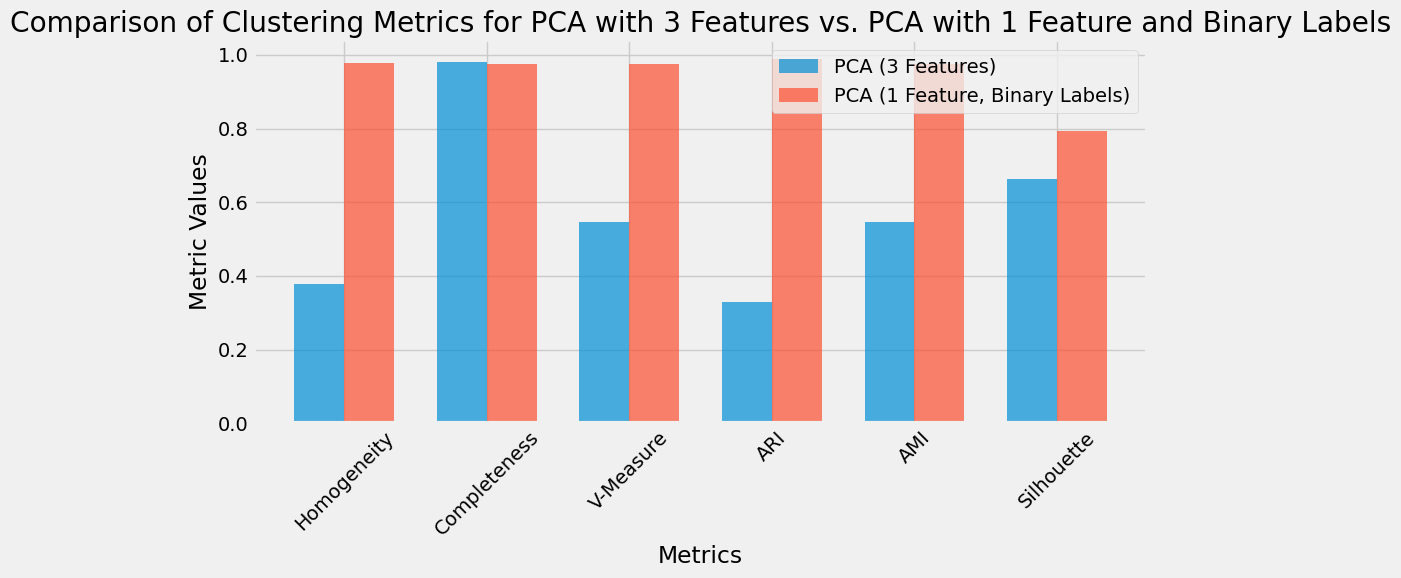

In [27]:
# Define the clustering metrics for both approaches
metrics_pca_3 = {
    "Homogeneity": 0.378,
    "Completeness": 0.981,
    "V-Measure": 0.546,
    "ARI": 0.329,
    "AMI": 0.546,
    "Silhouette": 0.662,
}

metrics_pca_1_binary = {
    "Homogeneity": 0.977,
    "Completeness": 0.976,
    "V-Measure": 0.976,
    "ARI": 0.990,
    "AMI": 0.976,
    "Silhouette": 0.794,
}

# List of metric names
metric_names = list(metrics_pca_3.keys())

# List of metric values for each approach
values_pca_3 = list(metrics_pca_3.values())
values_pca_1_binary = [metrics_pca_1_binary.get(metric, np.nan) for metric in metric_names]

# Create a bar chart to compare metrics
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metric_names))

plt.bar(index, values_pca_3, bar_width, label='PCA (3 Features)', alpha=0.7)
plt.bar(index + bar_width, values_pca_1_binary, bar_width, label='PCA (1 Feature, Binary Labels)', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Metric Values')
plt.title('Comparison of Clustering Metrics for PCA with 3 Features vs. PCA with 1 Feature and Binary Labels')
plt.xticks(index + bar_width / 2, metric_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### In the end, let's compare our finalist: PCA with 1 feature binary and binary two clusters.

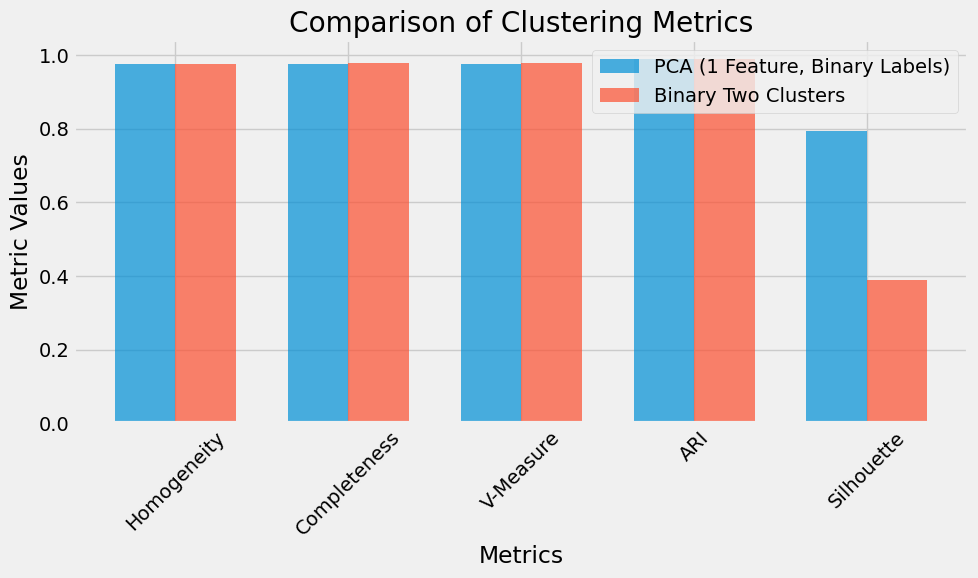

In [28]:
# Define the clustering metrics for PCA with 1 feature and binary labels
metrics_pca_1_binary = {
    "Homogeneity": 0.977,
    "Completeness": 0.976,
    "V-Measure": 0.976,
    "ARI": 0.990,
    "Silhouette": 0.794,
}

# Define the clustering metrics for binary two clusters
metrics_binary = {
    "Homogeneity": 0.977,
    "Completeness": 0.978,
    "V-Measure": 0.978,
    "ARI": 0.991,
    "AMI": 0.978,
    "Silhouette": 0.390
}

# List of metric names
metric_names = list(metrics_pca_1_binary.keys())

# List of metric values for PCA with 1 feature and binary labels
values_metrics_pca_1_binary = [metrics_pca_1_binary.get(metric, np.nan) for metric in metric_names]

# List of metric values for binary two clusters, with NaN for missing metrics
values_metrics_binary = [metrics_binary.get(metric, np.nan) for metric in metric_names]

# Create a bar chart to compare metrics
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metric_names))

plt.bar(index, values_metrics_pca_1_binary, bar_width, label='PCA (1 Feature, Binary Labels)', alpha=0.7)
plt.bar(index + bar_width, values_metrics_binary, bar_width, label='Binary Two Clusters', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Metric Values')
plt.title('Comparison of Clustering Metrics')
plt.xticks(index + bar_width / 2, metric_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion and future work

> In this project, we explored the Human Activity Recognition (HAR) dataset, which includes smartphone sensor data collected during various activities. We applied unsupervised learning techniques, including K-Means clustering and Principal Component Analysis (PCA), to understand patterns in the data and evaluate their effectiveness in clustering and dimensionality reduction.

### Key Takeaways:

> **K-Means Clustering:** We initially applied K-Means clustering to the dataset to identify patterns and group similar activities. We experimented with different numbers of clusters and assessed the clustering performance using metrics such as inertia, homogeneity, completeness, and silhouette score.

> **Binary Labels:** To improve clustering performance, we converted the original activity labels into binary labels (0 for not moving and 1 for moving) and re-evaluated the K-Means clustering. The results showed that binary labels improved clustering performance significantly.

> **PCA Dimensionality Reduction:** We applied PCA to reduce the dimensionality of the dataset and visualize the data in lower-dimensional spaces. We found that using only one principal component achieved good clustering results, indicating that much of the variance in the data can be explained by a single feature.

> **Comparative Analysis:** We compared the performance of K-Means clustering with binary labels and PCA (1 feature) against the original K-Means clustering with 2 clusters. The results showed that the combination of PCA (1 feature) and binary labels outperformed the other methods in terms of various clustering metrics, including ARI, AMI, and silhouette score.

> **Visualization:** We visualized the data in reduced dimensions using PCA, providing insights into the distribution of activities in the lower-dimensional space.

> **Further Research:** Areas for further research and improvements include exploring different clustering algorithms beyond K-Means, experimenting with various dimensionality reduction techniques, and investigating more advanced feature engineering methods to enhance clustering performance.

Overall, this project demonstrates the importance of preprocessing and feature engineering in enhancing the performance of unsupervised learning techniques for activity recognition. The combination of PCA and binary labels proved to be a promising approach for this dataset, but further research and experimentation are encouraged to explore alternative methods and optimize clustering results.